# Handling Missing Values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\EDA\Churn_Modelling.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  gender           10000 non-null  object 
 15  age              10000 non-null  object 
dtypes: float64(2), int64(9), object(5)
memory usage: 1.2+ MB


In [11]:
import random


# Randomly select 56 indices for the 'gender' column
gender_indices = random.sample(range(len(df)), min(56, len(df)))
df.loc[gender_indices, 'Gender'] = ''

# Randomly select 300 indices for the 'age' column
age_indices = random.sample(range(len(df)), min(300, len(df)))
df.loc[age_indices, 'Age'] = ''

# Save the modified DataFrame back to a CSV file
output_file_path = 'modified_file.csv'  # Replace 'modified_file.csv' with the desired output file path
df.to_csv(output_file_path, index=False)

C:\Users\amir\AppData\Local\Temp\ipykernel_9208\2297823353.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[age_indices, 'Age'] = ''


In [15]:
dfm = pd.read_csv("modified_file.csv")
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  gender           9889 non-null   object 
 15  age              9415 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 1.2+ MB


In [17]:
dlt_col = ["age", "gender"]
dfm = dfm.drop(columns=dlt_col)
df.to_csv('modified_file.csv', index=False)

In [18]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# find null values in the data


In [19]:
print(dfm.isnull().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              56
Age                300
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


# Filling the Missing Values - imputation
- Filling the missing data with mean or median value if it's a numerical variable.
- Filling the missing data with mode if it's a categorical value.
- Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not ral or is different.
- Filling the categorical value with a new type for the missing values.

In [20]:
dfm['Age'].mean()

38.93773195876289

In [21]:
dfm['Age'].median()

37.0

In [22]:
# fillna: fill the null records
# dropna: drop the null records
updated_df = dfm
updated_df['Age']=updated_df['Age'].fillna(dfm['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [23]:
updated_df1 = dfm
updated_df1['Age']=updated_df1['Age'].fillna(dfm['Age'].median())
updated_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# Forward & Backward Filling - Imputation

In [25]:
df = pd.read_csv('D:\EDA\modified_file.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  gender           9889 non-null   object 
 15  age              9415 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 1.2+ MB


In [27]:
df1 = df

In [28]:
df1['Age'] = df1['Age'].bfill()

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  gender           9889 non-null   object 
 15  age              9415 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 1.2+ MB


In [30]:
df2 = df

In [31]:
df2['Age'] = df2['Age'].ffill()

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9944 non-null   object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  gender           9889 non-null   object 
 15  age              9415 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 1.2+ MB


# Feature Scaling

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv('D:\EDA\modified_file.csv')

what is Normalization?
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. it is also known as Min-Max scaling.

What is Standardization?
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,n,n
1,2,15647311,Hill,608,Spain,Female,NaN,1,83807.86,1,0,1,112542.58,0,n,n
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,n,n
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,n,n
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,n,n


In [10]:
new_df = pd.DataFrame(df,columns=['Age', 'Tenure'])

In [11]:
new_df.head(5)

,Age,Tenure
0,42.0,2
1,NaN,1
2,42.0,8
3,39.0,1
4,43.0,2


In [12]:
new_df['Age']=new_df['Age'].fillna(new_df['Age'].mean())

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10000 non-null  float64
 1   Tenure  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


# Normalization

In [14]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

[[0.32432432 0.2       ]
 [0.28294232 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


Let's take another small example

In [17]:
x_array = np.array([[2],[3],[5],[6]])
scaler = MinMaxScaler()
normalized_arr = scaler.fit_transform(x_array)
print(normalized_arr)

[[0.  ]
 [0.25]
 [0.75]
 [1.  ]]


# Standardization

In [18]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(new_df)
print(standardized_df)

[[ 2.96089278e-01 -1.04175968e+00]
 [-6.87020479e-16 -1.38753759e+00]
 [ 2.96089278e-01  1.03290776e+00]
 ...
 [-2.84047942e-01  6.87129857e-01]
 [ 2.96089278e-01 -6.95981772e-01]
 [-1.05756424e+00 -3.50203865e-01]]


Let's take another small example

In [20]:
x_array = np.array([[2],[3],[5],[6],[6]])
scaler = StandardScaler()
normalized_arr_ss = scaler.fit_transform(x_array)
print(normalized_arr_ss)

[[-1.47709789]
 [-0.86164044]
 [ 0.36927447]
 [ 0.98473193]
 [ 0.98473193]]


# 3-Sigma Technique (Standard Deviation)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [25]:
data = pd.read_csv('D:\EDA\sales.csv')

In [26]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [27]:
# Function to Detection Outlier on one-dimensional datasets.
def find_anomalies(data):
    #define a list to accumulate anomalies
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    
    # 3-standard deviation
    anomaly_cut_off = random_data_std * 3
    
    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies


In [28]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [29]:
list_1 = find_anomalies(data['price'])

In [30]:
len(list_1)

461

In [31]:
len(data)

29580

In this case, by performing this calculation ((461 / 29580) * 100), it is determined that 1.55% of the price data are outliers and are outside the positive and negative sigma range.

In [32]:
data.price.skew()

4.312009366902366

In [33]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

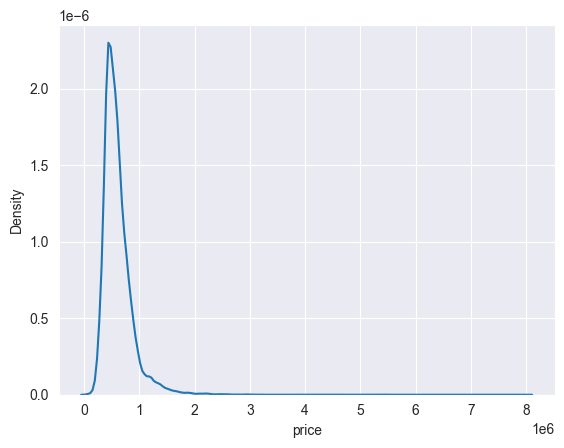

In [34]:
sns.kdeplot(data.price)

In [35]:
data['price_transformed'] = np.log(data.price)

In [36]:
data.price_transformed.skew()

0.4731646269984763

 We normalize the data with a logarithmic scale and bring the skewness index close to zero

In [37]:
list_2 = find_anomalies(data.price_transformed)

In [38]:
len(list_2)

266

In [39]:
len(data)

29580

<Axes: xlabel='price_transformed', ylabel='Density'>

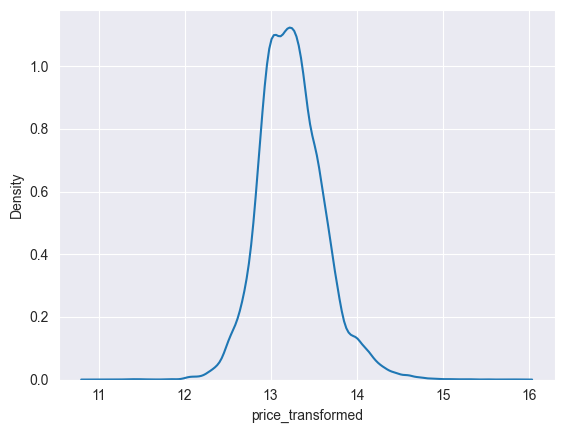

In [40]:
sns.kdeplot(data.price_transformed)

In [41]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [42]:
data['price_transformed_double'].skew()

0.33092530655758573

In [43]:
list_3 = find_anomalies(data.price_transformed_double)

In [44]:
len(list_3)

251

In [45]:
len(data)

29580

<Axes: xlabel='price_transformed_double', ylabel='Density'>

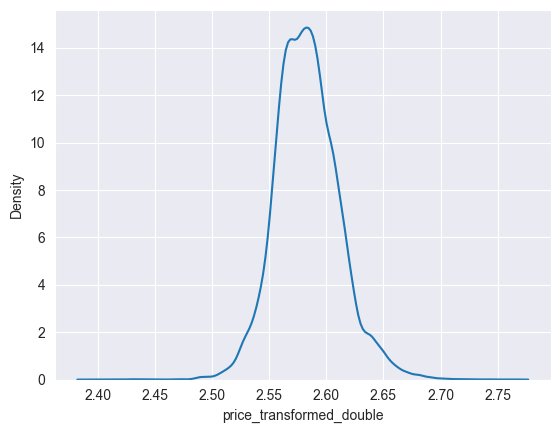

In [46]:
sns.kdeplot(data.price_transformed_double)

- Anything below 40 or above 80 are considered as outliers

# Boxplots

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: >

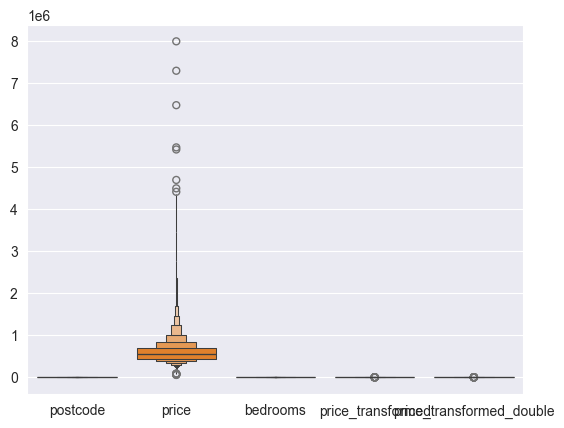

In [48]:
sns.boxenplot(data)

The above code dispalys the plot below.
- As you can see, it considers everything above 75 or below ~ -35 to be an outlier. The results are very close to method 1 above.

In [49]:
import pandas as pd 


In [50]:
df = pd.DataFrame(data)

In [51]:
len(df)

29580

In [52]:
# Statistical information of the dataframe columns
df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


### Inter Quartile Range
#### IQR = Q3 - Q1

In [53]:
list1 = [43, 54, 56 , 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [54]:
len(list1)

25

In [55]:
max(list1)

99

In [56]:
min(list1)

43

In [57]:
import statistics

In [58]:
statistics.mean(list1)

76.96

In [59]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

To find the 90th percentile for these (ordered) scores, start by multiplying 90 percent times the total number of scores, which gives 90% * 25 = 0.90 * 25 = 22.5 (the index). Rounding up to the nearest whole number, you get 23.

In [60]:
list2 = sorted(list1)

In [61]:
list2

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

Hence, 98 is the 90th percentile for this dataset

Now say you want to find the 20th percentile. Start by taking 0.20 * 25 = 5 (the index); this is a whole number, which tells you the 20th percentile is the average of the 5th and 6th values in the ordered data set (62 and 66).


so, 20th percentile is 62+66/2=64